## Observations and Insights 

In [220]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
all_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [221]:
# Checking the number of mice.
all_data["Mouse ID"].count()

1893

In [222]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = all_data[all_data.duplicated(keep="first")]
duplicates["Mouse ID"].count()


1

In [223]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0

In [224]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = all_data.drop([0,909])

In [225]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].count()

1891

## Summary Statistics

In [226]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

volume_summary_df = cleaned_data[["Drug Regimen","Tumor Volume (mm3)"]]


regimen_df = volume_summary_df.groupby(["Drug Regimen"])

mean_volume = regimen_df["Tumor Volume (mm3)"].mean()
median_volume = regimen_df["Tumor Volume (mm3)"].median()
var_volume = regimen_df["Tumor Volume (mm3)"].var()
sd_volume = regimen_df["Tumor Volume (mm3)"].std()
SEM = regimen_df["Tumor Volume (mm3)"].sem()

volume_summary_table = pd.DataFrame({
    "Mean":mean_volume,
    "Median":median_volume,
    "Variance":var_volume,
    "Standard Deviation":sd_volume,
    "SEM":SEM
})

volume_summary_table


Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.368318  50.909965  42.278090            6.502160  0.514041
Ramicane      40.195673  40.668343  23.488945            4.846539  0.321676
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [260]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = volume_summary_df.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.195673  40.668343  23.488945  4.846539  0.321676
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements Taken')

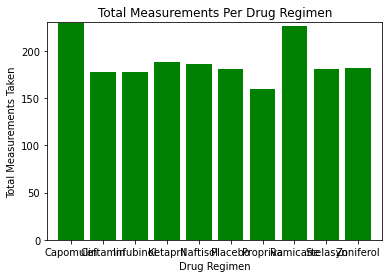

In [315]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = np.arange(len(reg))
entries = regimen_df["Tumor Volume (mm3)"].count()
entries

drug = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
counts=[230,178,178,188,186,181,160,227,181,182]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width=0.8, color="g", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(counts)+0.4)

plt.title("Total Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
